In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import pynocular as pn

In [2]:
# Generate some test data
p = pn.PointData()
p['x'] = np.linspace(0, 1, 100)
p['y'] = np.random.rand(100)
p['a'] = p['x'] ** 2 * p['y']

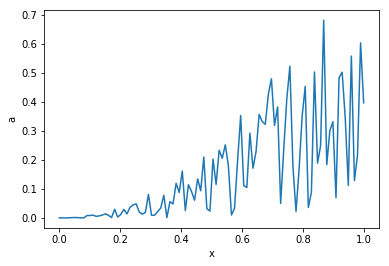

In [3]:
# let's make a simple plot
p.plot('x', 'a')

In [4]:
p2 = pn.PointData(x=np.random.rand(100))
#p2['x'] = np.random.rand(200)

In [5]:
p2

Data(OrderedDict([('x', array([0.42221255, 0.96060816, 0.19179697, 0.0550022 , 0.48414286,
       0.23180825, 0.70985956, 0.29566063, 0.53122937, 0.66020772,
       0.12331492, 0.90266766, 0.69531762, 0.17291652, 0.50398128,
       0.08588842, 0.99196774, 0.01378311, 0.05307416, 0.57098693,
       0.65347919, 0.19480394, 0.17416778, 0.22564269, 0.72521241,
       0.2329869 , 0.11998347, 0.64408621, 0.5866359 , 0.48673553,
       0.9234944 , 0.15125947, 0.90076782, 0.33081579, 0.34800537,
       0.69067814, 0.20633618, 0.80521378, 0.42214171, 0.31949731,
       0.70534732, 0.05021168, 0.46010788, 0.96673599, 0.96199061,
       0.99169333, 0.31785343, 0.20981408, 0.38492888, 0.01319066,
       0.53872417, 0.83565664, 0.01434225, 0.6924622 , 0.61328294,
       0.16962876, 0.91560428, 0.93610426, 0.6798088 , 0.57635644,
       0.48469871, 0.94569024, 0.13767965, 0.34063081, 0.51244448,
       0.35470913, 0.02058205, 0.06592107, 0.76739619, 0.56109277,
       0.58058102, 0.90312689, 0.21870

In [6]:
#p2.plot()
#p2['a'] = p.interpolate('a', method='linear')#(p2).plot('x', 'a', '.')
p2 = p.interpolate('a', method='linear')(pn.PointData(x=np.random.rand(100)))#.plot('x', 'a', '.')

Automatic interpolation with respect to x


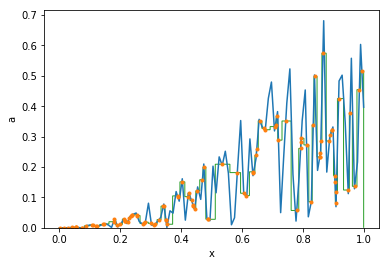

In [7]:
p.plot('x', 'a')
p2.plot('.')
p2.interpolate('a', method='nearest')(x=np.linspace(0,1,1000)).plot()

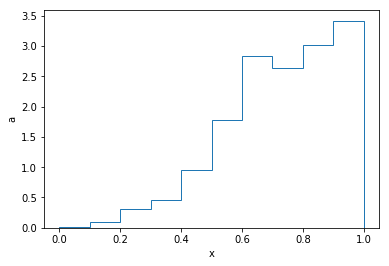

In [8]:
# Generate a histogram function for histograms with weight 'a'
f = p.histogram('a')

# we can evaluate the function on, say 'x', which returns a new object
g = f('x')

# let's plot the result
g.plot()

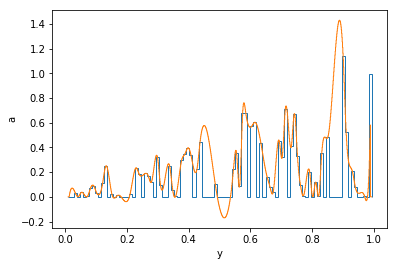

In [9]:
p.histogram('a')(y=100).plot()
p.histogram('a', function=np.sum, fill_value=np.nan)(y=100).interpolate('a', method='cubic')(y=1000).plot()

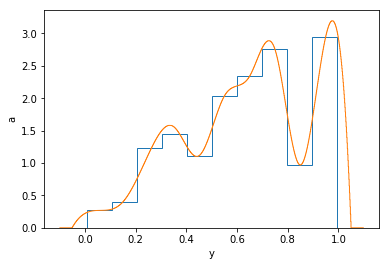

In [10]:
p.histogram('a')('y').plot()
p.histogram('a')(y=np.linspace(-0.1,1.1,13)).interpolate('a', method='cubic')(y=1000).plot()

In [11]:
p.histogram('a')(x=10).grid

Grid(
Dimension("x",
points = None,
edges = array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))
nbins = 10),)

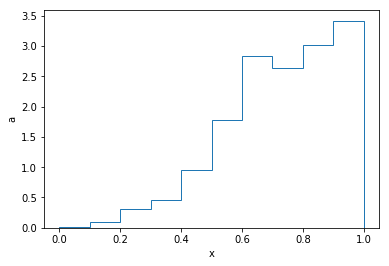

In [12]:
# or in one line
p.histogram('a')('x').plot()

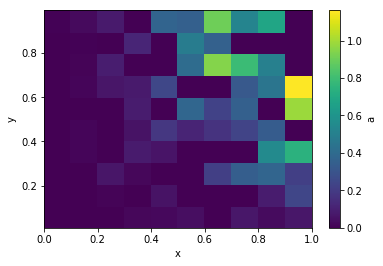

In [13]:
# we can also evaluate the histogram in different dimensions
p.histogram('a')('x', 'y').plot(cbar=True)

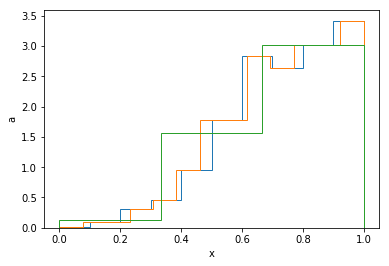

In [14]:


# we can also evaluate the histogram in different dimensions
g = p.histogram('a')('x').plot()
g = p.histogram('a')('x').resample('a')(x=13).plot()
g = p.histogram('a')('x').resample('a')(x=3).plot()


In [15]:
f = p.histogram('a')('x').resample('a')

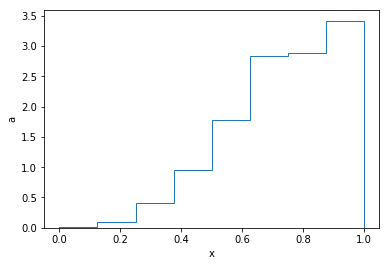

In [16]:
f(f(x=8)).plot()

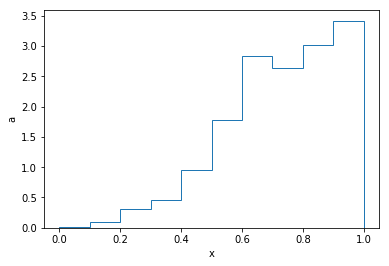

In [17]:
# or the function from before in a different binnig
f(x=30).plot()

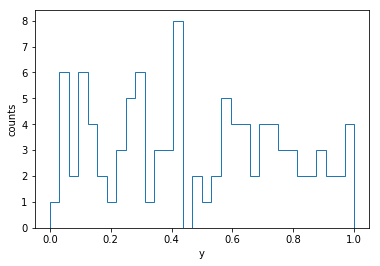

In [18]:
# a histogram with no weights, evaluated in y
p.histogram()(y=np.linspace(0,1,33)).plot()

In [19]:
# the returned object is a GridData type
g = p.histogram('a')(x=20)

In [20]:
# it has a grid defined
g.grid

Grid(
Dimension("x",
points = None,
edges = array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]))
nbins = 20),)

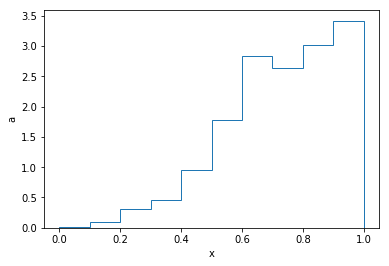

In [21]:
# this evaluates the function from earlier on g
f(g).plot()

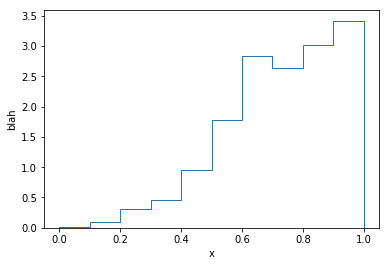

In [22]:
# or assign it a new variable which will automatically evaluate (looks a bit abstract)
g['blah'] = f
g.plot('blah')

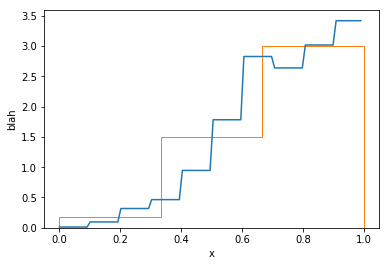

In [23]:
g.lookup('blah')(p).plot('x', 'blah')#'x', 'blah')
g.resample('blah')(x=3).plot()#'x', 'blah')

In [24]:
#p['blah'] = 

p2 = g.lookup('blah')(p)

In [25]:
p2 = pn.PointData()
p2['x'] = np.linspace(0,1,33)

In [26]:
p2['blah'] = g.lookup('blah')

In [27]:
p2['f'] = g.lookup('blah')

In [28]:
p2

Data(OrderedDict([('x', array([0.     , 0.03125, 0.0625 , 0.09375, 0.125  , 0.15625, 0.1875 ,
       0.21875, 0.25   , 0.28125, 0.3125 , 0.34375, 0.375  , 0.40625,
       0.4375 , 0.46875, 0.5    , 0.53125, 0.5625 , 0.59375, 0.625  ,
       0.65625, 0.6875 , 0.71875, 0.75   , 0.78125, 0.8125 , 0.84375,
       0.875  , 0.90625, 0.9375 , 0.96875, 1.     ])), ('blah', array([0.01238782, 0.01238782, 0.01238782, 0.01238782, 0.09680211,
       0.09680211, 0.09680211, 0.31829699, 0.31829699, 0.31829699,
       0.46474853, 0.46474853, 0.46474853, 0.94641564, 0.94641564,
       0.94641564, 1.78218704, 1.78218704, 1.78218704, 1.78218704,
       2.82549635, 2.82549635, 2.82549635, 2.63704855, 2.63704855,
       2.63704855, 3.01544883, 3.01544883, 3.01544883, 3.41568134,
       3.41568134, 3.41568134,        nan])), ('f', array([0.01238782, 0.01238782, 0.01238782, 0.01238782, 0.09680211,
       0.09680211, 0.09680211, 0.31829699, 0.31829699, 0.31829699,
       0.46474853, 0.46474853, 0.46474853, 0

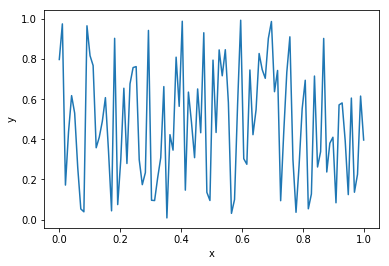

In [71]:
p.plot('x', 'y')

In [30]:
p.data

OrderedDict([('x',
              array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
                     0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
                     0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
                     0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
                     0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
                     0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
                     0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
                     0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
                     0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
                     0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
                     0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
                     0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
         

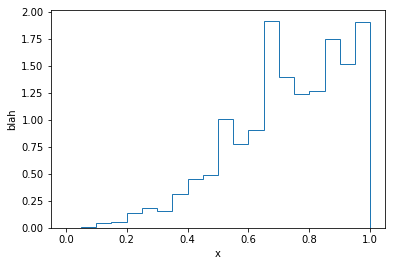

In [31]:
# or again all together
g['blah'] = p.histogram('a')
g.plot('blah')

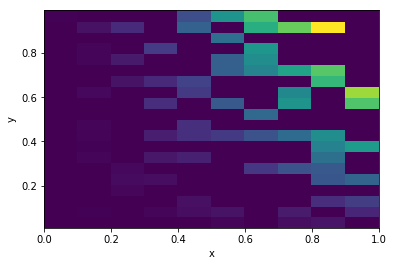

In [32]:
p.histogram('a', method='mean')('x', y=20).plot()

In [33]:
p.histogram('a', function=lambda x : np.percentile(x,50))('x', y=20)['a']

array([[2.60533837e-04,            nan,            nan, 7.02472741e-05,
                   nan, 9.52417155e-04,            nan,            nan,
        4.00603306e-04,            nan, 1.35376718e-03,            nan,
        1.00860007e-03,            nan,            nan,            nan,
        0.00000000e+00,            nan,            nan, 4.04055826e-03],
       [1.29198667e-03, 2.75956160e-03,            nan,            nan,
                   nan,            nan, 8.97878095e-03, 5.26182445e-03,
        7.07907949e-03, 9.79769573e-03,            nan,            nan,
        1.39543802e-02,            nan,            nan, 9.47815296e-03,
        8.33562690e-03,            nan, 2.98650164e-02,            nan],
       [           nan,            nan,            nan, 1.29597244e-02,
        1.87395840e-02, 1.38153651e-02,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan, 3.29850023e-02,            nan, 4.6576

In [34]:
g = pn.GridData('x','y')

In [35]:
g.grid

Grid(
Dimension("x",
points = None,
edges = None)
nbins = 10),
Dimension("y",
points = None,
edges = None)
nbins = 10),)

In [36]:
g['b'] = p.histogram()

In [37]:
g.grid

Grid(
Dimension("x",
points = None,
edges = array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))
nbins = 10),
Dimension("y",
points = None,
edges = array([0.00851947, 0.10701371, 0.20550795, 0.30400219, 0.40249642,
       0.50099066, 0.5994849 , 0.69797914, 0.79647338, 0.89496762,
       0.99346186]))
nbins = 10),)

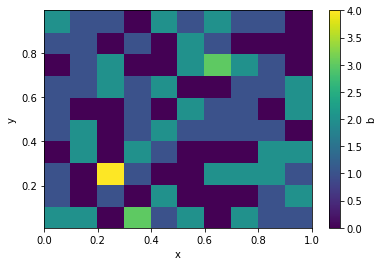

In [38]:
g.plot(cbar=True)

In [39]:
g['x']

array([[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
       [0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15],
       [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25],
       [0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35],
       [0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45],
       [0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55],
       [0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65],
       [0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75],
       [0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85],
       [0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95]])

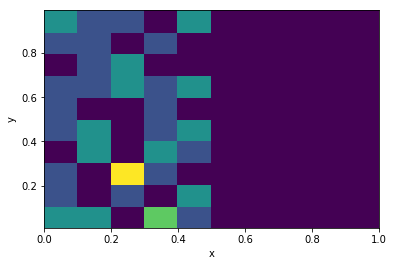

In [40]:
g['c'] = p[p['x'] < 0.5].histogram()
g.plot('c')

In [41]:
grid = pn.grid.Grid(x=[0., 0.5,np.inf], y=10)

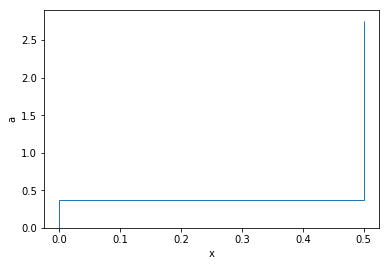

In [42]:
p.histogram('a', method='mean')(grid).histogram('a')('x').plot()

In [43]:
p[p['x'] < 1].histogram()

<function pynocular.data.Data.histogram.<locals>.fun(*args, **kwargs)>

In [44]:
# let's go a bit crazy....what's f(f(x))?
# it's the same as f(x) here because we already histogrammed

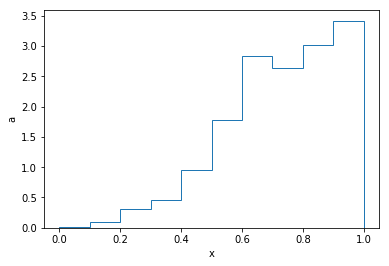

In [45]:
f(f('x')).plot()

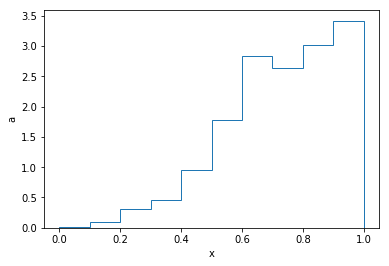

In [46]:
# or first histogram it in x and y and then only x.....again the same
f('x').histogram('a')('x').plot()

In [47]:
p.vars

['x', 'y', 'a']

In [48]:
g = f(x=100)

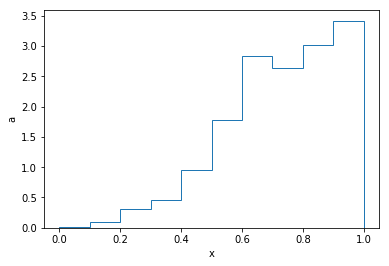

In [49]:
g.plot('a')

In [50]:
g.grid.point_meshgrid

[array([0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085,
        0.095, 0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175,
        0.185, 0.195, 0.205, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265,
        0.275, 0.285, 0.295, 0.305, 0.315, 0.325, 0.335, 0.345, 0.355,
        0.365, 0.375, 0.385, 0.395, 0.405, 0.415, 0.425, 0.435, 0.445,
        0.455, 0.465, 0.475, 0.485, 0.495, 0.505, 0.515, 0.525, 0.535,
        0.545, 0.555, 0.565, 0.575, 0.585, 0.595, 0.605, 0.615, 0.625,
        0.635, 0.645, 0.655, 0.665, 0.675, 0.685, 0.695, 0.705, 0.715,
        0.725, 0.735, 0.745, 0.755, 0.765, 0.775, 0.785, 0.795, 0.805,
        0.815, 0.825, 0.835, 0.845, 0.855, 0.865, 0.875, 0.885, 0.895,
        0.905, 0.915, 0.925, 0.935, 0.945, 0.955, 0.965, 0.975, 0.985,
        0.995])]

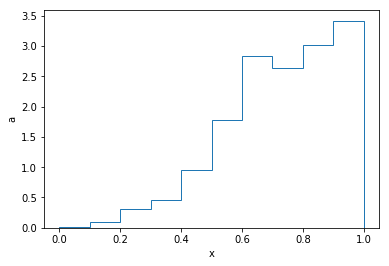

In [51]:
g.interpolate('a', method='cubic')(x=100).plot()

In [52]:
np.concatenate([[1,2,3], [3,4]])

array([1, 2, 3, 3, 4])

In [53]:
a = {'x':2}

In [54]:
a.update({'y':7})

In [55]:
a

{'x': 2, 'y': 7}

In [56]:
from collections import OrderedDict

In [57]:
a = OrderedDict({'x':2})


In [58]:
a

OrderedDict([('x', 2)])

In [59]:
a.update({'y':7})

In [60]:
a

OrderedDict([('x', 2), ('y', 7)])

In [61]:
a.update({'x':23})

In [62]:
a

OrderedDict([('x', 23), ('y', 7)])

In [63]:
a['k'] = a.pop('y')

In [64]:
a

OrderedDict([('x', 23), ('k', 7)])

In [65]:
a = np.arange(24).reshape(4,3,2)

In [66]:
a

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

In [67]:
a.reshape(-1, *a.shape[2:])[0] +=1

In [68]:
a

array([[[ 1,  2],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

In [69]:
p2['b'] = np.arange(len(p2)*2).reshape(-1,2)

In [70]:
p2.histogram('b')('x')

ValueError: object too deep for desired array

In [ ]:
list(range(10))[2:]

In [74]:
isinstance(3., float)

True

In [84]:
g.grid
#

Grid(
Dimension("x",
points = None,
edges = array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ]))
nbins = 100),)

In [86]:
g.resample('a')(x=0.5).grid

Grid(
Dimension("x",
points = None,
edges = array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]))
nbins = 50),)

In [87]:
g.resample('a')(x=0.5).resample('a')(x=0.5).resample('a')(x=0.5).grid

Grid(
Dimension("x",
points = None,
edges = array([0.        , 0.08333333, 0.16666667, 0.25      , 0.33333333,
       0.41666667, 0.5       , 0.58333333, 0.66666667, 0.75      ,
       0.83333333, 0.91666667, 1.        ]))
nbins = 12),)